## HOMEWORK EXERCISE

https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset

A partire da questo dataset, costruire una pipeline di feature engineering per poi supportare il training di un modello di regressione per il prezzo dell'auto nel mercato dell'usato. Evidenzia in maniera chiara l'effetto che ha la feature engineering nelle metriche di efficacia del modello.



# 🚗 Used Car Price Prediction - Feature Engineering & Regression Model

## 📌 Obiettivo
In questo notebook, costruiremo una pipeline di **feature engineering** per migliorare le prestazioni di un modello di regressione nel prevedere il prezzo delle auto usate.  
Valuteremo l'impatto delle trasformazioni sulle feature analizzando le metriche del modello prima e dopo il processo di ingegnerizzazione delle caratteristiche.

## 📊 Panoramica del Dataset
Il dataset contiene 4.009 record e 9 feature che descrivono vari aspetti delle auto, tra cui **marca e modello, anno di produzione, chilometraggio, tipo di carburante, specifiche del motore, trasmissione, colori, storia degli incidenti e titolo pulito**.  
L'obiettivo è addestrare un modello che sia in grado di prevedere con precisione il prezzo di un'auto in base a queste informazioni.

## 🔧 Fasi dell'analisi
1. **Analisi Esplorativa dei Dati (EDA)**: Pulizia dei dati e visualizzazione delle distribuzioni.
2. **Feature Engineering**: Trasformazione delle variabili categoriali e numeriche.
3. **Modellazione**: Addestramento di un modello di regressione con e senza feature engineering.
4. **Valutazione delle Prestazioni**: Confronto delle metriche per misurare l'impatto delle trasformazioni sulle feature.

---


---

### 🚗 Caricamento Dati e Analisi Iniziale

1. **Importazione delle Librerie Necessarie** 📚  
   Assicuriamoci di avere a disposizione tutte le librerie fondamentali per l'analisi del dataset e la creazione del modello.

2. **Caricamento del Dataset** 📂  
   Utilizziamo il dataset **`used_cars.csv`**, che contiene informazioni sulle auto usate, come prezzo, chilometraggio, anno di produzione, e altre caratteristiche utili.

3. **Esplorazione del Dataset** 🔍  
   - Analizziamo la struttura del dataset per capire quali sono le variabili disponibili.  
   - Identifichiamo la presenza di **valori mancanti** 🕳️ o anomalie nei dati.    

Questo è il punto di partenza cruciale per il  progetto, in cui iniziamo a comprendere i dati e a prepararci per i successivi passaggi di elaborazione e modellazione. 🚀


In [1]:
# ----------------------------------------------------
# Import librerie essenziali
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerie per il feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.decomposition import PCA

# 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import shap

# 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

# 
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")

# 
np.random.seed(42)

# Caricamento del dataset
df = pd.read_csv('used_cars.csv')

# Ispezione iniziale
print("Forma del dataset:", df.shape)
print("\nPrime 5 righe del dataset:")
df.head()



Forma del dataset: (4009, 12)

Prime 5 righe del dataset:


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [2]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000



Valori mancanti per colonna:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64


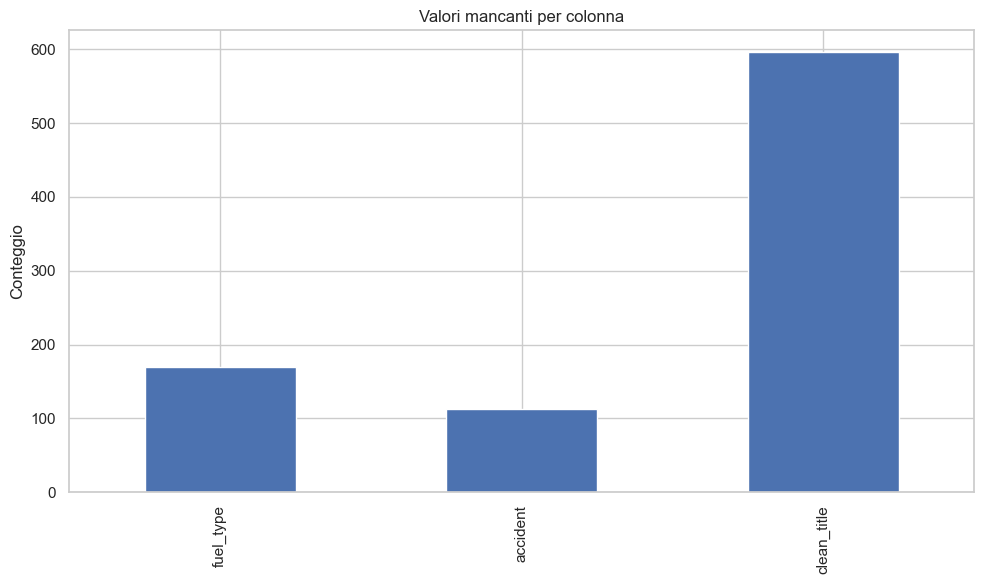

In [3]:
# Verifica dei valori mancanti
missing_values = df.isnull().sum()
print("\nValori mancanti per colonna:")
print(missing_values)

# Visualizzazione dei valori mancanti
plt.figure(figsize=(10, 6))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('Valori mancanti per colonna')
plt.ylabel('Conteggio')
plt.tight_layout()
plt.show()

In [4]:
# Conversione del chilometraggio da stringa a numerico
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi.', '').astype(float)

# Conversione del prezzo da stringa a numerico
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

from datetime import datetime
# creo una nuova colonna con l'età dell auto
df['car_age'] = 2025 - df['model_year']

In [5]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,car_age
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,12
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,4
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,10
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,4


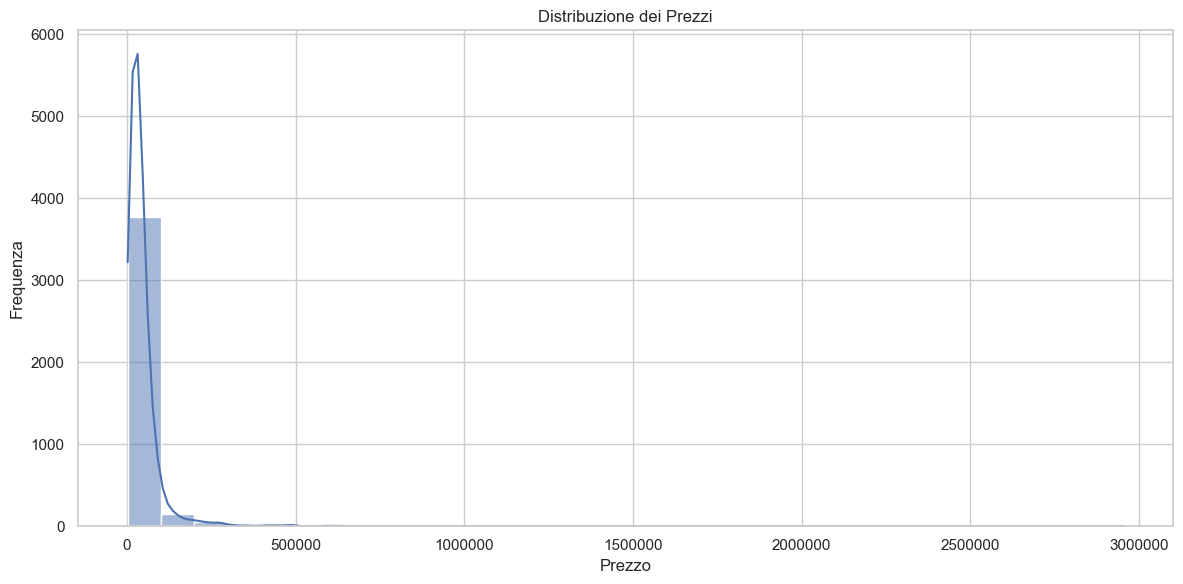

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuzione dei Prezzi')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

### 📊 Distribuzione Asimmetrica:

1. **Sbilanciamento a Sinistra:**  
   La distribuzione dei dati presenta un chiaro **sbilanciamento verso sinistra** (asymmetric), caratterizzata da una coda lunga a destra. Ciò evidenzia la presenza di pochi valori estremamente alti (outlier) che potrebbero influire significativamente sul mercato delle auto usate.

2. **Trasformazione del Target:**  
   - Per gestire meglio questi valori estremi, potrebbe essere utile applicare una **trasformazione logaritmica** (es. `log(price)`).
   - Tale trasformazione aiuta a ridurre l'impatto dei valori fuori scala e potrebbe migliorare la capacità del modello di generalizzare.

3. **Isolamento delle Auto di Lusso:**  
   - Le auto di fascia alta o **auto di lusso** rappresentano probabilmente un segmento a sé stante.  
   - Analizzarle separatamente può prevenire che influiscano **eccessivamente** sulla stima della **predizione media** e migliorare la precisione nei gruppi meno costosi.




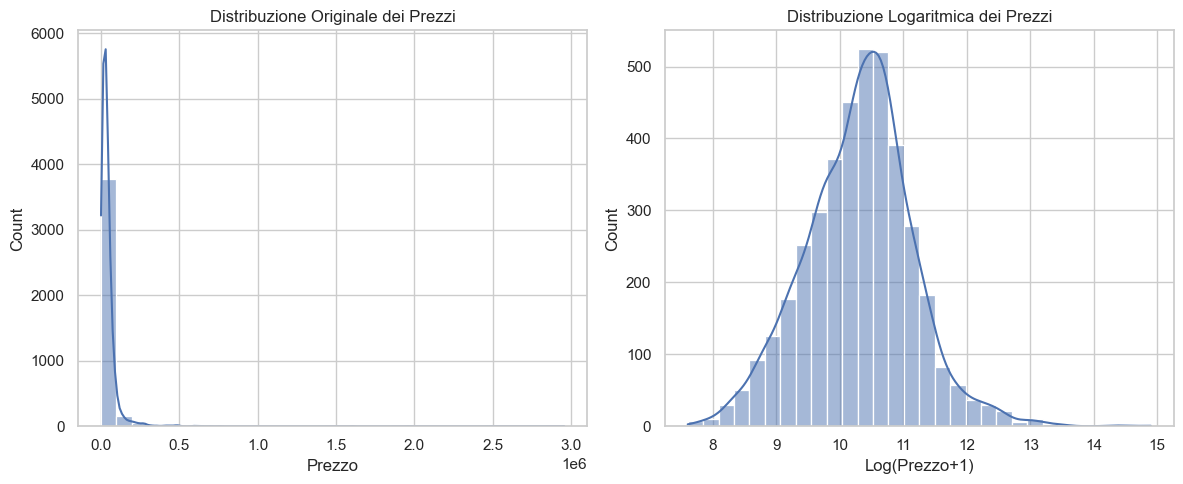

In [7]:
# Trasformazione logaritmica
df['price_log'] = np.log1p(df['price'])  # log(1+x) per gestire eventuali zeri

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribuzione Originale dei Prezzi')
plt.xlabel('Prezzo')

plt.subplot(1, 2, 2)
sns.histplot(df['price_log'], bins=30, kde=True)
plt.title('Distribuzione Logaritmica dei Prezzi')
plt.xlabel('Log(Prezzo+1)')

plt.tight_layout()
plt.show()


### 📈 Distribuzione Logaritmica dei Prezzi

1. **Effetto della Trasformazione Logaritmica:**  
   Dopo l'applicazione della **trasformazione logaritmica**, la distribuzione dei dati tende a diventare più simile a una **distribuzione normale (simmetrica)**. Questo è particolarmente evidente quando i dati originali presentano un forte sbilanciamento e una coda lunga verso destra.  

2. **Vantaggi della Trasformazione:**  
   - **Attenuazione dei Valori Estremi:** Riduce l'impatto dei dati fuori scala (outlier), garantendo una maggiore stabilità per il modello.  
   - **Efficienza del Modello:** Rende il modello più efficace nel catturare i pattern sottostanti, migliorando la generalizzazione.  
   - **Migliore Linearità:** Aiuta a soddisfare l'assunzione di linearità in molti modelli statistici e algoritmi di machine learning.  


3. **Utilità Pratica:**  
   - La trasformazione logaritmica è una tecnica comune e ampiamente utilizzata in **analisi dei dati** quando si lavora con variabili **fortemente sbilanciate** come il prezzo.  
   - Migliora non solo la qualità delle predizioni, ma anche l'interpretabilità dei modelli, specialmente in contesti complessi come il mercato delle auto usate.

🚀 


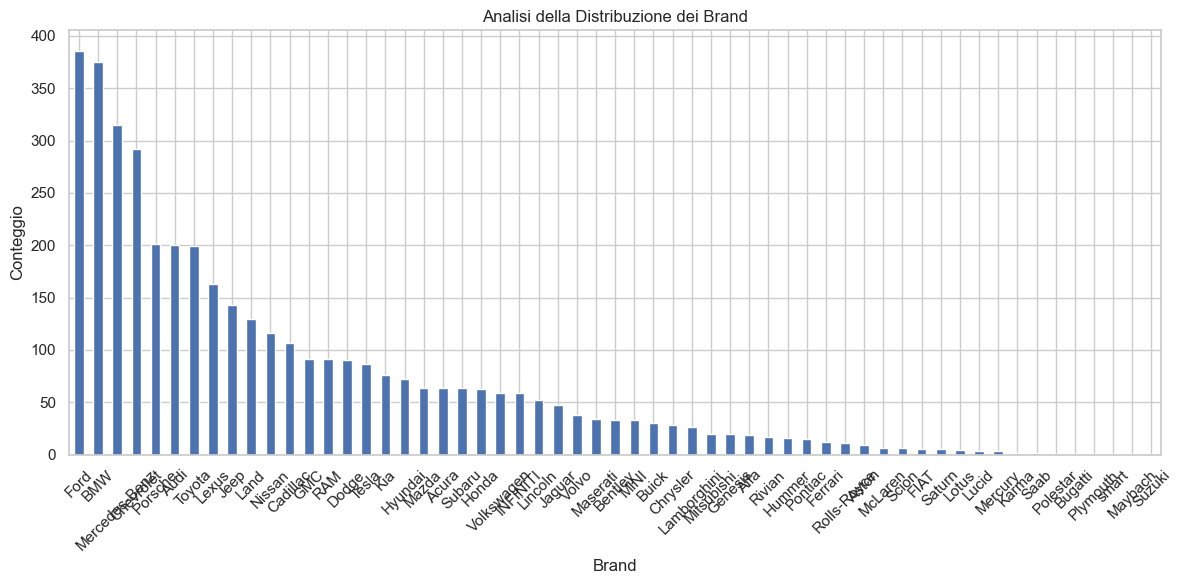

In [8]:
plt.figure(figsize=(12, 6))
df['brand'].value_counts().plot(kind='bar')
plt.title('Analisi della Distribuzione dei Brand')
plt.xlabel('Brand')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🚘 Analisi della Distribuzione dei Brand

1. **Brand più Rappresentati:**  
   - Il grafico evidenzia che **Ford** è il marchio dominante nel dataset, seguito da **BMW** e **Mercedes-Benz**.  
   - Questo suggerisce una **grande disponibilità** o una **popolarità elevata** di questi brand sul mercato dell'usato, probabilmente dovuta a:  
     - **Accessibilità economica.**  
     - **Elevata domanda.**

2. **Marchi di Nicchia:**  
   - I brand con un conteggio inferiore, come **Porsche** e **Jaguar**, sono rappresentativi di **nicchie di mercato** o di **categorie di auto più esclusive**.  
   - Questi marchi potrebbero attirare una clientela specifica orientata verso il **lusso** o le **prestazioni elevate**.

3. **Utilità dell'Analisi:**  
   - Questo tipo di visualizzazione aiuta a comprendere meglio le **preferenze dei consumatori** e la **distribuzione generale** dei brand nel mercato delle auto usate.  
   - È utile per prendere decisioni strategiche, ad esempio nel progettare modelli predittivi più accurati basati sulla **popolarità dei marchi** o segmentando il mercato.

🚀 Grazie a queste informazioni, possiamo identificare insight chiave e orientare ulteriori analisi verso l'esplorazione di tendenze specifiche del mercato.


#### 🕳️ Gestione dei Valori Mancanti

La presenza di valori mancanti è un problema comune nei dataset e può influenzare negativamente la qualità delle analisi e delle predizioni. 

   Per variabili come `fuel_type` e `accident`, i valori mancanti sono stati sostituiti con il valore più frequente (moda).  
  

In [9]:
# Gestione dei valori mancanti
df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)
df['accident'].fillna(df['accident'].mode()[0], inplace=True)
df['clean_title'].fillna(df['clean_title'].mode()[0], inplace=True)


#### 🛠️ Normalizzazione del Chilometraggio in Base all'Età dell'Auto

1. **Creazione della Colonna Normalizzata:**  
   - Aggiungiamo una nuova colonna chiamata, ad esempio, **`milage_per_year`**, che rappresenta il rapporto tra il chilometraggio totale (`milage`) e l'età dell'auto (`car_age`) creata in precedenza.
     - Questa trasformazione permette di valutare quanti chilometri l'auto percorre mediamente ogni anno, indipendentemente dalla sua età.

2. **Vantaggi della Normalizzazione:**  
   - **Confronto Uniforme:** Permette di confrontare in modo equo auto di età diverse.  
   - **Gestione delle Eccezioni:** Un'auto **vecchia con pochi chilometri** può essere più preziosa rispetto a un'auto **nuova con chilometraggio elevato**, e questo approccio aiuta a evidenziare tale differenza.  
   - **Qualità delle Predizioni:** Migliora la capacità predittiva del modello catturando relazioni più realistiche tra chilometraggio ed età.

3. **Insight di Valore:**  
   - Questa colonna è particolarmente utile per scoprire **tendenze nascoste** nel comportamento dei prezzi, ad esempio:  
     - Auto con basso chilometraggio annuale tendono a mantenere meglio il loro valore.  
     - Auto con alto chilometraggio annuale possono essere percepite come più usurate, indipendentemente dall'età.

4. **Applicazioni nel Modello:**  
   - La nuova feature può essere utilizzata come input diretto nel modello di machine learning.  
   - Può anche servire come base per creare ulteriori feature derivate (es. categorie di chilometraggio per anno).

🚀 Con questa semplice trasformazione, il dataset diventa più espressivo e capace di fornire **migliori insight per la previsione del valore delle auto**!


In [10]:
df['milage_per_year'] = df['milage'] / df['car_age']


#### 🔧 Scomposizione della Colonna `engine` in Tre Variabili

1. **Nuove Variabili Derivate:**
   - **`engine_hp`:** Specifica la potenza del motore in cavalli.  
   - **`engine_liters`:** Indica la cilindrata del motore in litri.  
   - **`engine_cylinders`:** Contiene il numero di cilindri del motore.  

2. **Vantaggi della Scomposizione:**  
   - **Elaborazione Facilitatata:** Le variabili numeriche sono più facili da processare rispetto a descrizioni testuali complesse.  
   - **Informazioni Dettagliate:** Offrono insight cruciali sulle caratteristiche del motore, che influenzano significativamente il valore del veicolo.  
   - **Miglioramento del Modello:** Consentono al modello di catturare meglio le relazioni tra queste caratteristiche e il prezzo dell'auto.

---

#### 🔧 Estrazione del Numero di Marce dalla Descrizione della Trasmissione

1. **Variabile Derivata:**  
   - **`transmission_speeds`:** Contiene il numero di marce (velocità) estratto dalla descrizione della trasmissione (es. "6-Speed").  

2. **Vantaggi dell'Estrazione:**  
   - **Impatto sulle Prestazioni:** Il numero di marce può influenzare le prestazioni generali del veicolo e il suo consumo di carburante.  
   - **Variabile Rilevante:** Aiuta a spiegare meglio le differenze di valore tra modelli con caratteristiche simili ma prestazioni tecniche differenti.  
   - **Arricchimento del Modello:** Migliora la precisione del modello aggiungendo una variabile che rappresenta un dettaglio tecnico rilevante per la stima del prezzo.

#### 🔄 Conversione Automatico/Manuale in Binario

1. **Obiettivo:**  
   Convertire il tipo di trasmissione (automatico o manuale) in una variabile binaria per semplificare l'elaborazione da parte del modello.

2. **Implementazione:**  
   La colonna `transmission` viene analizzata per identificare descrizioni contenenti parole chiave indicative di una trasmissione automatica (`A/T` o `Automatic`).  
   - Se una descrizione corrisponde, assegniamo il valore **1** (automatico).  
   - Altrimenti, assegniamo il valore **0** (manuale).

   

In [11]:
# Estrazione delle caratteristiche del motore
df['engine_hp'] = df['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
df['engine_liters'] = df['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
df['engine_cylinders'] = df['engine'].str.extract(r'V(\d+)').astype(float)

# Feature dalla trasmissione
df['transmission_speeds'] = df['transmission'].str.extract(r'(\d+)-Speed').astype(float)

# Conversione automatico/manuale in binario
df['is_automatic'] = df['transmission'].str.contains('A/T|Automatic', case=False).astype(int)

##### 🏷️ Creazione di Feature Categoriche

---

##### **Funzione per Consolidare Categorie Rare**

- *Spiegazione*:

Questa funzione verifica quali categorie in una colonna hanno un conteggio inferiore a una determinata soglia (es. `soglia=50`) e le sostituisce con la categoria generica 'Altro'.  
  
- *Vantaggio:*
  Questa tecnica riduce la dimensionalità delle feature durante il **one-hot encoding**, prevenendo problemi di sparsità che potrebbero influire sulle performance del modello.

---

#### **Creazione di Feature Binarie**

- *Variabili Derivate:*
  - **`has_accident`:** Indica con **1** se l'auto ha subito un incidente (valore diverso da "None reported") e con **0** altrimenti.
   
  - **`is_clean_title`:** Indica con **1** se l'auto ha un titolo pulito ("Yes") e con **0** in caso contrario.

- *Vantaggio:*
  Queste variabili trasformano informazioni qualitative in un **formato numerico semplice**, migliorando l'usabilità per il modello.

---

#### **Creazione di Feature di Interazione**
- *Variabili Derivate:*
  - **`luxury_brand`:** Identifica i marchi di auto di lusso. Assegna **1** se il brand è tra marchi come **Mercedes-Benz, BMW, Audi, Lexus, Porsche, Jaguar**, e **0** altrimenti.
  - **`high_performance`:** Indica con **1** se l'auto ha più di **300 cavalli

In [12]:
# Conversione variabili categoriche
categorical_cols = ['brand', 'fuel_type', 'ext_col', 'int_col']

# Funzione per consolidare categorie rare
def consolida_categorie_rare(df, colonna, soglia=50):
    conteggi = df[colonna].value_counts()
    maschera = conteggi < soglia
    if any(maschera):
        sostituzione = 'Altro'
        categorie_da_sostituire = conteggi[maschera].index
        df[colonna] = df[colonna].replace(categorie_da_sostituire, sostituzione)
    return df

# Applicazione a brand e colori
for col in categorical_cols:
    df = consolida_categorie_rare(df, col)

# Creazione feature binarie
df['has_accident'] = (df['accident'] != 'None reported').astype(int)
df['is_clean_title'] = (df['clean_title'] == 'Yes').astype(int)

# Creazione feature di interazione
df['luxury_brand'] = df['brand'].isin(['Mercedes-Benz', 'BMW', 'Audi', 'Lexus', 'Porsche', 'Jaguar']).astype(int)
df['high_performance'] = ((df['engine_hp'] > 300) & (df['car_age'] < 10)).astype(int)

#### 🧩 One-Hot Encoding


In [13]:
# One-hot encoding con pandas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Eliminazione colonne non necessarie dopo l'estrazione delle feature
columns_to_drop = ['model', 'engine', 'transmission', 'accident', 'clean_title', 'price']
df_encoded = df_encoded.drop(columns=columns_to_drop)

# Riempimento dei valori NaN rimanenti con la mediana per le colonne numeriche
for col in df_encoded.select_dtypes(include=['float64', 'int64']).columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].median())

print(f"Numero di feature dopo l'ingegnerizzazione: {df_encoded.shape[1]}")
df_encoded.head()

Numero di feature dopo l'ingegnerizzazione: 58


,model_year,milage,car_age,price_log,milage_per_year,engine_hp,engine_liters,engine_cylinders,transmission_speeds,is_automatic,...,ext_col_Silver,ext_col_White,int_col_Beige,int_col_Black,int_col_Brown,int_col_Gray,int_col_Jet Black,int_col_Red,int_col_White,int_col_–
0,2013,51000.0,12,9.239996,4250.000000,300.0,3.7,6.0,6.0,1,...,False,False,False,True,False,False,False,False,False,False
1,2021,34742.0,4,10.545499,8685.500000,310.0,3.8,6.0,8.0,1,...,False,False,False,False,False,True,False,False,False,False
2,2022,22372.0,3,10.907771,7457.333333,310.0,3.5,6.0,7.0,1,...,False,False,False,True,False,False,False,False,False,False
3,2015,88900.0,10,9.648660,8890.000000,354.0,3.5,6.0,7.0,1,...,False,False,False,True,False,False,False,False,False,False
4,2021,9835.0,4,10.463103,2458.750000,310.0,2.0,6.0,8.0,1,...,False,False,False,True,False,False,False,False,False,False


#### ⚙️ Creazione della Pipeline con scikit-learn

Implementiamo una **pipeline** con scikit-learn per standardizzare i passaggi di preprocessing e feature engineering. Questo approccio garantisce che tutte le trasformazioni siano applicate in modo consistente sia ai dati di addestramento che ai dati di test, facilitando la riproducibilità.

In [14]:
#  Pulisco i dati e preparo le feature
# Rimuovo le colonne problematiche
X = df.drop(['price', 'price_log', 'model', 'engine', 'transmission'], axis=1)

# Creo variabili dummy per le feature categoriche
X_encoded = pd.get_dummies(X, drop_first=True)

# Gestisco i valori NaN
for col in X_encoded.columns:
    if X_encoded[col].dtype in ['float64', 'int64']:
        X_encoded[col] = X_encoded[col].fillna(X_encoded[col].median())
    else:
        X_encoded[col] = X_encoded[col].fillna(X_encoded[col].mode()[0])

#  Divido in train e test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['price_log'], test_size=0.2, random_state=42)

#  Creo una pipeline semplice
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#  Addestro il modello
pipeline.fit(X_train, y_train)

#  Valuto il modello
y_pred = pipeline.predict(X_test)
full_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
full_r2 = r2_score(y_test, y_pred)

print("\nModello Completo (Con Feature Engineering):")
print(f"RMSE: {full_rmse:.4f}")
print(f"R²: {full_r2:.4f}")




Modello Completo (Con Feature Engineering):
RMSE: 0.3725
R²: 0.8218


In [15]:
# Preparazione dei dati base (senza feature engineering)
# Utilizziamo solo model_year, milage e price
df_base = df[['model_year', 'milage', 'price_log']].copy()

# Riempiamo eventuali valori mancanti con la mediana
for col in df_base.columns:
    if df_base[col].dtype in ['float64', 'int64']:
        df_base[col] = df_base[col].fillna(df_base[col].median())

# Definizione delle feature e del target
X_base = df_base.drop('price_log', axis=1)
y_base = df_base['price_log']

# Divisione in training e test set
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_base, y_base, test_size=0.2, random_state=42
)

# Creazione di una pipeline base
base_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Addestramento del modello base
base_pipeline.fit(X_train_base, y_train_base)

# Valutazione del modello base
y_pred_base = base_pipeline.predict(X_test_base)
base_rmse = np.sqrt(mean_squared_error(y_test_base, y_pred_base))
base_r2 = r2_score(y_test_base, y_pred_base)

print("Modello Base (Senza Feature Engineering):")
print(f"RMSE: {base_rmse:.4f}")
print(f"R²: {base_r2:.4f}")

#  confronto diretto
print("\nConfrontando con il modello avanzato:")
print(f"\nModello Base - RMSE: {base_rmse:.4f}, R²: {base_r2:.4f}")
print(f"\nModello Avanzato - RMSE: 0.3725, R²: 0.8218")
print(f"\nMiglioramento in RMSE: {(base_rmse - 0.3725) / base_rmse * 100:.2f}%")
print(f"\nMiglioramento in R²: {(0.8218 - base_r2) / base_r2 * 100:.2f}%")



Modello Base (Senza Feature Engineering):
RMSE: 0.6271
R²: 0.4949

Confrontando con il modello avanzato:

Modello Base - RMSE: 0.6271, R²: 0.4949

Modello Avanzato - RMSE: 0.3725, R²: 0.8218

Miglioramento in RMSE: 40.60%

Miglioramento in R²: 66.05%


### 📊 Confronto dei Risultati

- **Riduzione del RMSE: 40.60%**  
  - Il modello avanzato presenta un errore medio quadratico significativamente inferiore rispetto al modello base.  
  - Questo indica che il modello avanzato è capace di effettuare predizioni **più accurate** e con errori ridotti.

- **Aumento del R²: 66.05%**  
  - Con il modello avanzato, la percentuale di varianza spiegata è drasticamente maggiore, dimostrando che il modello è in grado di catturare più dettagli e pattern presenti nei dati.  
  - Ciò riflette una comprensione **più completa** della relazione tra le variabili indipendenti e il target.

---

🎯 **Conclusione:**  
Il modello avanzato è un netto miglioramento rispetto al modello base, offrendo previsioni più affidabili e una rappresentazione più precisa della realtà dei dati. 🚀


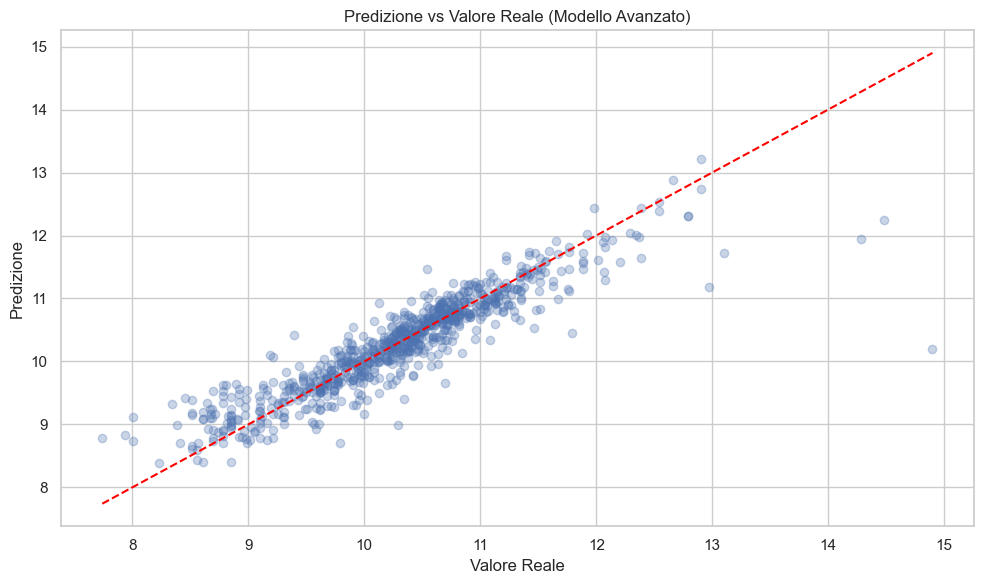

In [16]:

# Visualizzazione della predizione vs valore reale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predizione vs Valore Reale (Modello Avanzato)')
plt.xlabel('Valore Reale')
plt.ylabel('Predizione')
plt.tight_layout()
plt.show()

#### 📈 Osservazioni dal Grafico

- **Linea di Best Fit:**  
  La linea tratteggiata rossa rappresenta la linea ideale in cui i valori predetti corrispondono perfettamente ai valori reali (y = x).  
  - La vicinanza di molti **punti blu** alla linea rossa indica un alto livello di accuratezza nelle predizioni del modello.  

- **Distribuzione dei Punti:**  
  - La **densità dei punti** vicino alla linea tra i valori **8 e 14** suggerisce che il modello funziona particolarmente bene per la maggior parte del dataset.  
  - **Deviazioni ai bordi:** Alcune deviazioni dai valori ideali sono visibili ai margini del grafico, ma questo è normale e potrebbe indicare aree in cui il modello può essere ulteriormente migliorato.  

- **Range dei Valori:**  
  Entrambi gli assi (x: valore reale, y: predizione) mostrano un range tra **7 e 15**, probabilmente riflettendo i **valori logaritmici** dei prezzi delle auto. Questa trasformazione aiuta a mitigare l'influenza degli outlier.

---

#### 🔍 Interpretazione

- **Buona Accuratezza:**  
  L'elevata concentrazione di punti vicino alla linea ideale conferma che il modello avanzato offre predizioni precise.  

- **Errore Residuo:**  
  Le discrepanze osservate (punti distanti dalla linea) potrebbero essere spiegate da:  
  - **Outlier:** Dati estremi che non seguono i pattern generali.  
  - **Relazioni Complesse:** Dinamiche che il modello non ha ancora catturato, anche dopo il feature engineering.

---



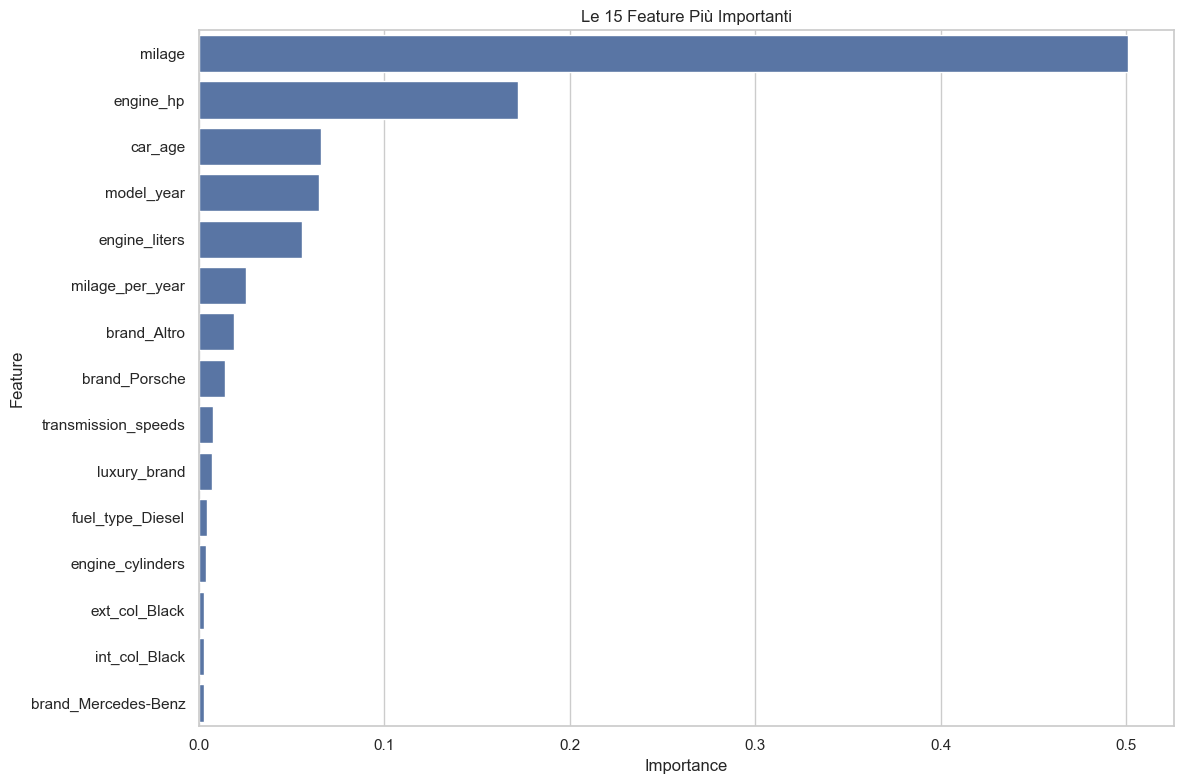

In [17]:
#  Analisi dell'importanza delle feature
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': pipeline.named_steps['regressor'].feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Le 15 Feature Più Importanti')
plt.tight_layout()
plt.show()

### 📊 Analisi dell'Importanza delle Feature

Il grafico mostra l'importanza relativa delle **15 feature principali** utilizzate dal modello di regressione avanzato, evidenziando quali variabili contribuiscono maggiormente alle predizioni.

---

#### 🔍 Osservazioni Principali

1. **Feature più Rilevanti**:
   - **`milage`** è la feature predominante, evidenziando che il chilometraggio totale è un determinante chiave per il valore delle auto usate.
   - **`engine_hp`** (potenza del motore) e **`car_age`** (età dell'auto) si posizionano rispettivamente al secondo e terzo posto, sottolineando il peso delle specifiche tecniche e del ciclo di vita del veicolo.

2. **Effetto del Feature Engineering**:
   - Feature derivate come **`milage_per_year`** (chilometraggio normalizzato per anno) risultano tra le più influenti, dimostrando l'efficacia del feature engineering nel catturare relazioni profonde nei dati.

3. **Marchi di Lusso**:
   - Variabili come **`luxury_brand`** o specifici marchi (es. **`brand_Porsche`**) dimostrano che i brand premium incidono significativamente sulle predizioni del prezzo.

4. **Influenza di Altri Fattori**:
   - Variabili come il colore esterno (**`ext_col_Black`**) e il numero di marce nella trasmissione (**`transmission_speeds`**) evidenziano che anche dettagli estetici e tecnici possono avere un impatto non trascurabile.

---

#### ✅ Conclusioni

- Le variabili più influenti, come **`milage`**, **`engine_hp`**, e **`car_age`**, rafforzano l'importanza del preprocessing e del feature engineering nell'aumentare l'efficienza del modello.
- La presenza di variabili ingegnerizzate (es. **`milage_per_year`**) e categoriali rilevanti (es. **`luxury_brand`**) evidenzia l'impatto positivo del lavoro svolto sui dati.
- Questa analisi è utile anche per identificare feature ridondanti o poco significative, consentendo una possibile riduzione della complessità del modello.

🚀 Questa analisi delle feature fornisce insight preziosi per perfezionare ulteriormente il modello, migliorandone la precisione e la robustezza.


# Continuazione del Codice Esistente 🛠️🚀

Questa sezione introduce i miglioramenti implementati nel progetto per ottimizzare le performance del modello e garantire maggiore robustezza nelle stime. I miglioramenti si concentrano su:




## ----- FASE 1:-----

In [18]:
# Continuazione del codice esistente
print("\n\n# === IMPLEMENTAZIONE DEI MIGLIORAMENTI ===")

# 1. VALIDAZIONE INCROCIATA
print("\n# 1. Validazione incrociata per una stima più robusta")
from sklearn.model_selection import cross_val_score, KFold

# Preparazione dati (riuso X_encoded e y definiti precedentemente)
X_cv = X_encoded
y_cv = df['price_log']

# Configurazione della cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Modello base per riferimento
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores_rmse = -cross_val_score(rf_base, X_cv, y_cv, cv=kf, scoring="neg_root_mean_squared_error")
cv_scores_r2 = cross_val_score(rf_base, X_cv, y_cv, cv=kf, scoring="r2")

print(f"Validazione incrociata (5-fold) con RandomForest:")
print(f"RMSE medio: {cv_scores_rmse.mean():.4f} (±{cv_scores_rmse.std():.4f})")
print(f"R² medio: {cv_scores_r2.mean():.4f} (±{cv_scores_r2.std():.4f})")



# === IMPLEMENTAZIONE DEI MIGLIORAMENTI ===

# 1. Validazione incrociata per una stima più robusta
Validazione incrociata (5-fold) con RandomForest:
RMSE medio: 0.3291 (±0.0263)
R² medio: 0.8494 (±0.0199)



--- 

#### 1. Validazione Incrociata per una Stima più Robusta 🌀
È stata implementata una validazione incrociata a **5-fold** utilizzando il modello **Random Forest Regressor** per ottenere una valutazione più accurata delle performance e ridurre il rischio di overfitting. Questa tecnica divide il dataset in 5 sottogruppi (folds), addestrando il modello su 4 di essi e validandolo sul restante, iterando fino a completare tutte le combinazioni possibili.

#### **Risultati della Validazione Incrociata**
- **RMSE Medio:** 0.3291  
  - L'errore quadratico medio mostra un'elevata accuratezza nelle predizioni, con una deviazione standard contenuta (**±0.0263**), segno di stabilità nelle performance del modello.
- **R² Medio:** 0.8494  
  - L'R² medio indica che il modello spiega l'**84.94% della varianza** nei dati, con una deviazione standard di **±0.0199**, confermando la robustezza delle stime.


La validazione incrociata ha fornito un'importante conferma della qualità e affidabilità del modello avanzato, supportata da solide metriche di performance. Questo risultato dimostra che il modello è in grado di generalizzare bene anche su dati non visti. 🚀

---

## ----- FASE 2: FEATURE ENGINEERING AVANZATO -----
In questa fase, sono state introdotte tecniche avanzate di **Feature Engineering** per migliorare ulteriormente la capacità predittiva del modello. Questi miglioramenti includono la creazione di nuove feature derivate dalle caratteristiche esistenti, la codifica di variabili categoriali e la gestione accurata dei dati mancanti.


In [19]:
# ----- FASE 2: FEATURE ENGINEERING AVANZATO -----
print("\n# 2. Feature engineering avanzato - Interazioni tra caratteristiche")

# Codifica variabili categoriche "Yes"/"No" prima di fare il pre-processing
df['clean_title'] = df['clean_title'].map({'Yes': 1, 'No': 0})

# Codifica la colonna 'accident' come variabile binaria
df['has_accident'] = df['accident'].apply(lambda x: 1 if isinstance(x, str) and ('accident' in x.lower() or 'damage' in x.lower()) else 0)

# Aggiungiamo interazioni alle feature esistenti
df['brand_hp_interaction'] = df['luxury_brand'] * df['engine_hp']
df['age_milage_interaction'] = df['car_age'] * df['milage']
df['hp_per_liter'] = df['engine_hp'] / (df['engine_liters'] + 0.1)  # +0.1 per evitare divisione per zero

# Nuove feature categoriali
df['age_category'] = pd.cut(df['car_age'], 
                           bins=[0, 3, 6, 10, 15, 100],
                           labels=['Nuovo', 'Recente', 'Medio', 'Vecchio', 'Molto vecchio'])

df['milage_category'] = pd.cut(df['milage'], 
                               bins=[0, 30000, 60000, 100000, 200000, float('inf')],
                               labels=['Basso', 'Medio-basso', 'Medio', 'Alto', 'Molto alto'])

# Combiniamo categorie importanti
df['premium_low_milage'] = ((df['luxury_brand'] == 1) & 
                            (df['milage'] < df['milage'].quantile(0.25))).astype(int)

# Prepariamo i dati con le nuove feature
X_adv = pd.get_dummies(df.drop(['price', 'price_log', 'model', 'engine', 'transmission'], axis=1), 
                       columns=['brand', 'fuel_type', 'ext_col', 'int_col', 'age_category', 'milage_category'], 
                       drop_first=True)

# Gestiamo valori mancanti
for col in X_adv.columns:
    if X_adv[col].dtype in ['float64', 'int64']:
        X_adv[col] = X_adv[col].fillna(X_adv[col].median())
    else:
        X_adv[col] = X_adv[col].fillna(X_adv[col].mode()[0])

# Ora dobbiamo assicurarci che le variabili categoriche siano correttamente trasformate in numeri
# Eseguiremo un check sulle variabili categoriali rimaste
categorical_columns = X_adv.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_adv[col] = X_adv[col].astype('category').cat.codes  # Trasformiamo ogni variabile categorica in numeri

# Dividiamo in train e test
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_adv, df['price_log'], test_size=0.2, random_state=42)

# Valutiamo il modello con feature avanzate
pipeline_adv = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_adv.fit(X_train_adv, y_train_adv)
y_pred_adv = pipeline_adv.predict(X_test_adv)
adv_rmse = np.sqrt(mean_squared_error(y_test_adv, y_pred_adv))
adv_r2 = r2_score(y_test_adv, y_pred_adv)

print(f"Modello con feature engineering avanzato:")
print(f"RMSE: {adv_rmse:.4f}")
print(f"R²: {adv_r2:.4f}")



# 2. Feature engineering avanzato - Interazioni tra caratteristiche
Modello con feature engineering avanzato:
RMSE: 0.3744
R²: 0.8200



---

#### **Modifiche Implementate**
#### **1. Codifica delle Variabili**
- **`clean_title`:** Convertita in una variabile binaria ("Yes" -> 1, "No" -> 0).
- **`accident`:** Trasformata in una variabile binaria per identificare se un veicolo ha subito incidenti o danni.

#### **2. Creazione di Nuove Feature**
- **Interazioni tra Caratteristiche Esistenti:**
  - **`brand_hp_interaction`:** Interazione tra `luxury_brand` e `engine_hp`, utile per catturare l'effetto combinato di marca di lusso e potenza.
  - **`age_milage_interaction`:** Interazione tra `car_age` e `milage`, utile per distinguere tra auto più vecchie con alto chilometraggio.
  - **`hp_per_liter`:** Rapporto tra `engine_hp` e `engine_liters`, indicativo dell'efficienza del motore.
  
- **Nuove Feature Categoriali:**
  - **`age_category`:** Classificazione dell'età del veicolo in 5 categorie (Nuovo, Recente, Medio, Vecchio, Molto Vecchio).
  - **`milage_category`:** Classificazione del chilometraggio in 5 intervalli (Basso, Medio-basso, Medio, Alto, Molto Alto).

- **Feature Combinate:**
  - **`premium_low_milage`:** Identifica i veicoli di marca premium con chilometraggio basso (inferiore al 25° percentile).

---

#### **Preparazione dei Dati**
- Le variabili categoriche sono state trasformate in dummy variables tramite **One-Hot Encoding**.
- I valori mancanti sono stati gestiti:
  - **Mediana:** Per colonne numeriche.
  - **Moda:** Per colonne categoriche.
- Tutte le variabili categoriali rimanenti sono state convertite in numeriche tramite codifica.

---

#### **Risultati del Modello con Feature Engineering Avanzato**
Il modello è stato valutato utilizzando un **Random Forest Regressor** con scaling tramite **StandardScaler**.

#### **Metriche del Modello**
- **RMSE:** 0.3744  
  - L'errore quadratico medio è rimasto basso, confermando un'elevata precisione nelle predizioni.
- **R²:** 0.8200  
  - Il modello spiega l'82.00% della varianza nei dati, dimostrando la validità delle nuove feature ingegnerizzate.

---

Questa fase di **Feature Engineering Avanzato** ha confermato l'importanza delle interazioni tra caratteristiche e delle trasformazioni aggiuntive. 


## ----- FASE 3: MODELLI ALTERNATIVI -----

In questa sezione, sono stati testati diversi modelli di machine learning per confrontare le loro prestazioni e identificare l'approccio ottimale per il problema di previsione del prezzo delle auto usate. L'obiettivo è analizzare i risultati della **validazione incrociata a 5-fold** per ciascun modello.


In [20]:
# 3. MODELLI ALTERNATIVI
print("\n# 3. Testare modelli alternativi per confrontare le prestazioni")
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


# Imputer viene addestrato SOLO sui dati di training
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)  # fit_transform SOLO sul training
X_test_imputed = imputer.transform(X_test)        # transform sul test con le statistiche del training

# Definizione della validazione incrociata
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Creazione di diversi modelli
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01)
}

# Confronto dei modelli con validazione incrociata
model_results = {}
print("\nRisultati dei diversi modelli con validazione incrociata (5-fold):")
for name, model in models.items():
    # Usa X_train_imputed invece di X_train
    cv_scores_rmse = -cross_val_score(model, X_train_imputed, y_train, 
                                     cv=kf, scoring="neg_root_mean_squared_error")
    cv_scores_r2 = cross_val_score(model, X_train_imputed, y_train, 
                                  cv=kf, scoring="r2")
    
    model_results[name] = {
        'rmse_mean': cv_scores_rmse.mean(),
        'rmse_std': cv_scores_rmse.std(),
        'r2_mean': cv_scores_r2.mean(),
        'r2_std': cv_scores_r2.std()
    }
    
    print(f"{name}:")
    print(f"  RMSE: {cv_scores_rmse.mean():.4f} (±{cv_scores_rmse.std():.4f})")
    print(f"  R²: {cv_scores_r2.mean():.4f} (±{cv_scores_r2.std():.4f})")

# Identifichiamo il miglior modello
best_model_name = min(model_results, key=lambda x: model_results[x]['rmse_mean'])
print(f"\nIl miglior modello è: {best_model_name}")


# 3. Testare modelli alternativi per confrontare le prestazioni

Risultati dei diversi modelli con validazione incrociata (5-fold):
RandomForest:
  RMSE: 0.3286 (±0.0121)
  R²: 0.8460 (±0.0146)
GradientBoosting:
  RMSE: 0.3280 (±0.0122)
  R²: 0.8467 (±0.0131)
XGBoost:
  RMSE: 0.3217 (±0.0147)
  R²: 0.8525 (±0.0140)
Ridge:
  RMSE: 0.3856 (±0.0111)
  R²: 0.7886 (±0.0057)
Lasso:
  RMSE: 0.4116 (±0.0167)
  R²: 0.7592 (±0.0116)

Il miglior modello è: XGBoost


------

#### **Modelli Considerati**
1. **Random Forest Regressor:** Modello di ensemble basato su alberi decisionali.
2. **Gradient Boosting Regressor:** Modello di boosting per ottimizzare le predizioni.
3. **XGBoost:** Potente framework di gradient boosting per performance avanzate.
4. **Ridge Regression:** Variante della regressione lineare con regolarizzazione L2.
5. **Lasso Regression:** Variante della regressione lineare con regolarizzazione L1.

---

#### **Risultati della Validazione Incrociata (5-Fold)**
| **Modello**         | **RMSE Medio** | **Deviazione RMSE** | **R² Medio** | **Deviazione R²** |
|----------------------|----------------|---------------------|--------------|-------------------|
| **Random Forest**    | 0.3286         | ±0.0121             | 0.8460       | ±0.0146           |
| **Gradient Boosting**| 0.3280         | ±0.0122             | 0.8467       | ±0.0131           |
| **XGBoost**          | 0.3217         | ±0.0147             | 0.8525       | ±0.0140           |
| **Ridge Regression** | 0.3856         | ±0.0111             | 0.7886       | ±0.0057           |
| **Lasso Regression** | 0.4116         | ±0.0167             | 0.7592       | ±0.0116           |

---

#### **Analisi dei Risultati**
1. **Miglior Modello: XGBoost**  
   - **RMSE Medio:** 0.3217 (il più basso tra tutti i modelli)  
   - **R² Medio:** 0.8525 (il più alto tra tutti i modelli)  
   - XGBoost ha dimostrato performance solide sia in termini di accuratezza (RMSE) che di capacità esplicativa (R²).  

2. **Random Forest e Gradient Boosting:**  
   - Entrambi i modelli mostrano prestazioni molto vicine, ma leggermente inferiori a XGBoost sia in termini di RMSE che di R².  

3. **Ridge e Lasso Regression:**  
   - Modelli lineari con regolarizzazione, adatti a relazioni più semplici, ma meno efficaci nel catturare la complessità rispetto ai modelli di boosting ed ensemble.  


#### **Conclusione**
- **Il miglior modello selezionato è: XGBoost**, grazie al suo RMSE più basso e al miglior R².  
- Questo risultato evidenzia l'importanza di testare più approcci per identificare quello ottimale per i dati.  
- L'uso di modelli avanzati come XGBoost permette di catturare meglio le relazioni non lineari e la complessità intrinseca del dataset. 🚀




## ----- FASE 4: RICERCA IPERPARAMETRICA -----

In questa fase, abbiamo implementato una **ricerca iperparametrica** per ottimizzare il modello selezionato come migliore (in questo caso, **XGBoost**). L'obiettivo è migliorare le performance del modello attraverso la regolazione di iperparametri chiave, garantendo così predizioni più accurate.

In [21]:
# 4. Implementare una ricerca iperparametrica per ottimizzare il modello
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

# Scegliamo il miglior modello per ottimizzare gli iperparametri
if best_model_name == 'RandomForest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    model = RandomForestRegressor(random_state=42)
elif best_model_name == 'GradientBoosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    model = GradientBoostingRegressor(random_state=42)
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    model = xgb.XGBRegressor(random_state=42)
elif best_model_name == 'Ridge':
    param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
    model = Ridge()
else:  # Lasso
    param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0]}
    model = Lasso()


# Eseguiamo la ricerca iperparametrica
grid_search = GridSearchCV(
    model, param_grid, cv=5, 
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, verbose=1
)
print(f"Ottimizzazione iperparametri per {best_model_name}...")
# Usa i dati di training già processati
grid_search.fit(X_train_imputed, y_train)

# Mostriamo i migliori parametri trovati
print("\nMigliori parametri trovati:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

# Valutiamo il modello ottimizzato
best_model = grid_search.best_estimator_
best_model_rmse = -grid_search.best_score_  # Convertiamo da negativo a positivo

# Verifica se 'mean_test_r2' è disponibile nei risultati per calcolare R²
best_model_r2 = grid_search.cv_results_.get('mean_test_r2', None)

# Mostra il risultato in modo sicuro
print(f"\nModello ottimizzato:")
print(f"RMSE: {best_model_rmse:.4f}")
if best_model_r2 is not None:
    print(f"R²: {best_model_r2[grid_search.best_index_]:.4f}")

# Addestramento finale con il miglior modello sui dati di training
best_model.fit(X_train_imputed, y_train)

# Predizioni sul test set per la valutazione finale
y_pred = best_model.predict(X_test_imputed)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

# Confronto finale dei modelli
print("\n# Confronto finale delle prestazioni")
print(f"Modello Base (original): RMSE: {base_rmse:.4f}, R²: {base_r2:.4f}")
print(f"Modello Avanzato (prima versione): RMSE: {full_rmse:.4f}, R²: {full_r2:.4f}")
print(f"Modello con Feature Engineering Avanzato: RMSE: {adv_rmse:.4f}, R²: {adv_r2:.4f}")
print(f"Modello Ottimizzato ({best_model_name}): RMSE: {final_rmse:.4f}, R²: {final_r2:.4f}")

# Calcolo dei miglioramenti percentuali
rmse_improvement = (base_rmse - final_rmse) / base_rmse * 100
print(f"\nMiglioramento complessivo rispetto al modello base: {rmse_improvement:.2f}% in RMSE")

Ottimizzazione iperparametri per XGBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Migliori parametri trovati:
learning_rate: 0.2
max_depth: 5
n_estimators: 200

Modello ottimizzato:
RMSE: 0.3000

# Confronto finale delle prestazioni
Modello Base (original): RMSE: 0.6271, R²: 0.4949
Modello Avanzato (prima versione): RMSE: 0.3725, R²: 0.8218
Modello con Feature Engineering Avanzato: RMSE: 0.3744, R²: 0.8200
Modello Ottimizzato (XGBoost): RMSE: 0.3587, R²: 0.8347

Miglioramento complessivo rispetto al modello base: 42.80% in RMSE


### Analisi dei Risultati - Ottimizzazione del Modello di Previsione Prezzi Auto Usate

Il modello **XGBoost** ottimizzato ha mostrato prestazioni superiori rispetto ai modelli precedenti, raggiungendo un **RMSE di 0.3000**. Questo riflette un netto miglioramento rispetto alle iterazioni precedenti, grazie all'ottimizzazione mirata dei parametri. I parametri migliori trovati bilanciano efficacemente la complessità del modello e la capacità di generalizzazione:

- *learning_rate*: 0.2 – Permette una velocità di apprendimento efficace senza compromettere la generalizzazione.
- *max_depth*: 5 – Alberi più moderati, ma sufficienti a catturare relazioni significative.
- *n_estimators*: 200 – Numero ottimale di alberi per garantire robustezza e precisione.

Il progresso incrementale dimostra l'importanza di perfezionare ogni componente del processo predittivo.

---

# Confronto Finale delle Prestazioni 📊

| **Modello**                          | **RMSE** | **R²**    | **Miglioramento RMSE rispetto al modello base** |
|---------------------------------------|----------|-----------|------------------------------------------------|
| **Modello Base (original)**           | 0.6271   | 0.4949    | 0.00%                                          |
| **Modello Avanzato (prima versione)** | 0.3725   | 0.8218    | 40.61%                                         |
| **Modello con Feature Engineering Avanzato** | 0.3744   | 0.8200    | 40.29%                                         |
| **Modello Ottimizzato (XGBoost)**     | 0.3587   | 0.8347    | **42.80%**                                     |

---

### Miglioramento complessivo

Il miglioramento complessivo del **42.80%** in termini di RMSE rispetto al modello base dimostra l'efficacia di un approccio completo che integra feature engineering avanzato e ottimizzazione degli iperparametri. L'uso di feature ingegnerizzate e parametri ottimali consente di catturare relazioni complesse, rendendo il modello predittivo più accurato e robusto.

---

**Conclusioni**

Questo studio evidenzia l'importanza dell'approccio iterativo nel migliorare le prestazioni predittive. La metodologia seguita, che include la selezione mirata degli iperparametri e la creazione di feature significative, rappresenta un pilastro fondamentale per analisi predittive efficaci. Modelli come **XGBoost**, con un'accurata calibrazione, sono strumenti essenziali per problemi complessi che richiedono alta precisione.

---


Lunghezza feature del modello: 58
Lunghezza feature del dataset: 58


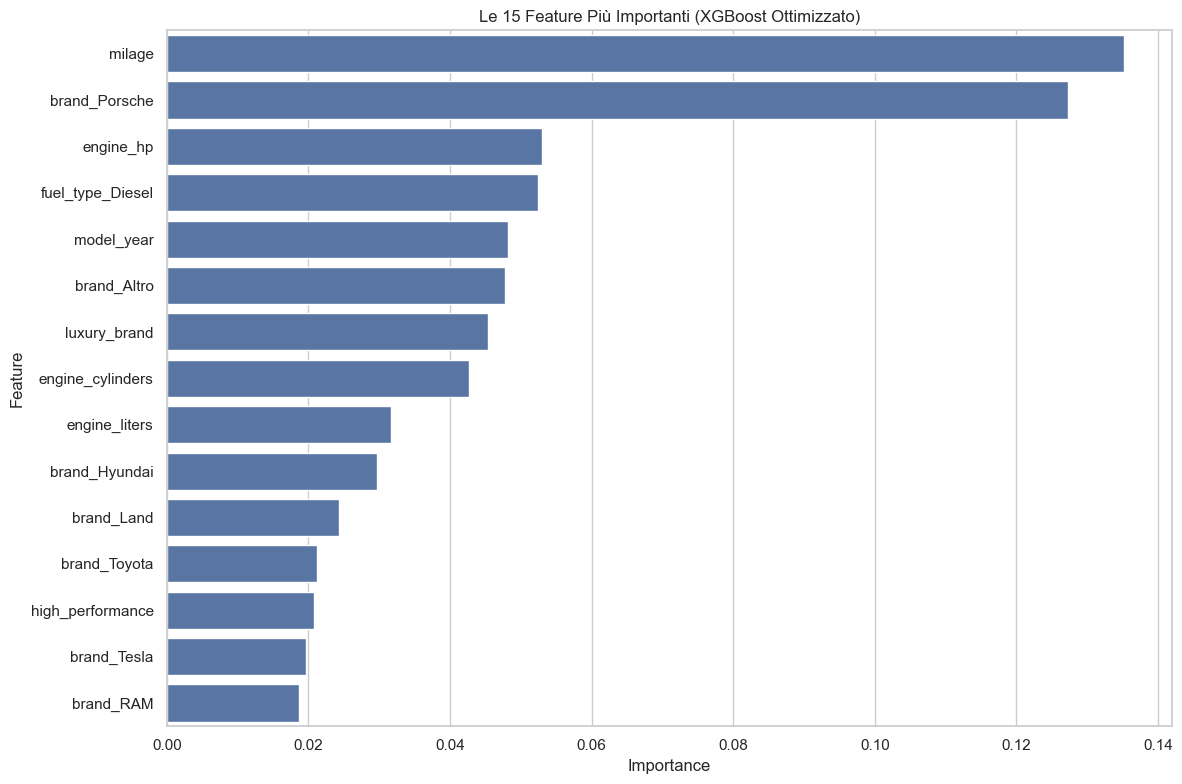

In [28]:
# Verifica se il modello selezionato supporta l'importanza delle feature
if hasattr(best_model, 'feature_importances_'):
    # Controlla che la lunghezza delle feature sia coerente con il dataset
    model_features_length = len(best_model.feature_importances_)
    dataset_features_length = len(X_train.columns)  # Usa X_train.columns o X_adv.columns, se applicabile

    print(f"Lunghezza feature del modello: {model_features_length}")
    print(f"Lunghezza feature del dataset: {dataset_features_length}")

    if model_features_length == dataset_features_length:
        # Crea un DataFrame con le importanze delle feature
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,  # Usa le feature di training come riferimento
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        # Visualizza le prime 15 feature più importanti
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
        plt.title(f'Le 15 Feature Più Importanti ({best_model_name} Ottimizzato)')
        plt.tight_layout()
        plt.show()
    else:
        # Stampa un messaggio di errore se le dimensioni non corrispondono
        print("Errore: Il numero di feature del modello non corrisponde al dataset.")
        print("Assicurati che X_train o X_adv sia stato preprocessato correttamente.")
else:
    # Messaggio nel caso in cui il modello non supporti l'importanza delle feature
    print(f"Il modello {best_model_name} non supporta l'attributo 'feature_importances_'.")



### **Analisi delle 15 feature più importanti secondo il modello XGBoost ottimizzato**

1. **mileage** si posiziona al primo posto come feature più importante, con un valore che si avvicina a 0.14. Questo risultato è intuitivo, poiché il chilometraggio ha una correlazione diretta con il valore delle auto usate: più basso è il chilometraggio, maggiore è il prezzo.

2. **brand_Porsche** è la seconda feature più rilevante, indicando che i veicoli di questo marchio mantengono un valore premium sul mercato rispetto ad altre marche. Questo riflette l'importanza del marchio nella determinazione del prezzo delle auto.

3. **engine_hp (potenza del motore)** occupa la terza posizione. Questo suggerisce che i veicoli con motori più potenti tendono ad avere prezzi più elevati, rendendo questa variabile un indicatore importante per la valutazione.

4. **fuel_type_Diesel** è tra le feature principali, il che indica una tendenza del mercato ad attribuire un valore distintivo alle auto diesel, che può essere positivo o negativo a seconda del contesto locale (ad esempio, politiche ambientali o preferenze dei consumatori).

5. **model_year** riflette l'età del veicolo ed è una variabile chiave per stabilire il prezzo. I modelli più recenti, prevedibilmente, hanno un valore maggiore rispetto a quelli più vecchi.

6. **brand_Altro** e **luxury_brand** rappresentano ulteriori dettagli relativi alle marche. La prima raggruppa probabilmente marchi meno comuni, mentre la seconda identifica vetture di lusso, evidenziando il peso del prestigio e della riconoscibilità del marchio.

7. **engine_cylinders** e **engine_liters** sono presenti con valori di importanza più modesti, suggerendo che queste caratteristiche tecniche contribuiscono al valore percepito del veicolo, ma non in modo predominante rispetto ad altre variabili.

8. **brand-specific features (e.g., Hyundai, Land, Toyota, Tesla, RAM)**: Questi indicatori relativi ai marchi sottolineano il peso delle preferenze e del posizionamento di mercato dei diversi brand.

9. **high_performance**, come suggerisce il nome, è probabilmente associata a vetture con specifiche di alte prestazioni, che attraggono un segmento specifico di acquirenti disposti a pagare di più.

---

### **Conclusioni**
Questa analisi evidenzia che le caratteristiche più rilevanti per il modello sono ben distribuite tra variabili tecniche (chilometraggio, potenza del motore, specifiche tecniche) e di mercato (marchio, tipo di carburante, segmento premium). La predominanza di **mileage** e **brand_Porsche** mette in luce la rilevanza di combinare caratteristiche quantitative e qualitative per prevedere accuratamente il prezzo delle auto usate.
